In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
may = pd.read_pickle('../data/may.pkl')
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [3]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5


In [4]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.1+ GB


#note - the entries and the index numbers are different because we removed bicycles from our dataset.  difference of 8920 entries, there's 8921 bicycles in the csv.

#i wonder how many individual scooters are in this dataset

In [5]:
may['sumdid'].value_counts() 

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
Powered6599831             1
Powered523737              1
Powered1PKP7               1
PoweredCW742BQMJ3XHN       1
PoweredGJYGPDVTFXRH7       1
Name: sumdid, Length: 8303, dtype: int64

#there's 8303 scooters across 20,283,582 rows of data
that's almost 2443 entries per scooter ... which i can see is not true.
max is 8921, min is 1

i wonder if there's a difference across companies as to how many times each scooter is entered
there's 7 companies - is SHOULD be something like 2,897,654 entries for each business if the distribution is equal

In [6]:
may['companyname'].value_counts()

3    7111655
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

the data is NOT equal
company 3 has a lot more info than anyone else
companies 1 and 5 are right about where i predicted
companies 0 and 4 are a little above and below
companies 2 and 6 are way underreported compared to the other 5.

In [7]:
may.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
dtype: int64

In [8]:
may.loc[may['sumdid'] == 'PoweredLIRL1']
#company0 = may.loc[may['sumdid'] == 'PoweredLIRL1']
#note: Jeremiah's query to look at how often a scooter is pinged.  this one is every 5 mins

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0
...,...,...,...,...,...,...
20209588,2019-05-31 22:00:15.960,36.191117,-86.781360,PoweredLIRL1,53.0,0
20213207,2019-05-31 22:05:16.080,36.191117,-86.781360,PoweredLIRL1,53.0,0
20216631,2019-05-31 22:10:16.483,36.191096,-86.781369,PoweredLIRL1,53.0,0
20220463,2019-05-31 22:15:16.653,36.191096,-86.781369,PoweredLIRL1,53.0,0


so one of the scooters that had only 1 entry ... 

In [9]:
may.loc[may['sumdid']== 'Powered1PKP7']

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
16270541,2019-05-27 21:46:35.653,36.176051,-86.76609,Powered1PKP7,82.0,0


same company ... interesting.

let me try and find out how many scooters each of these companies have.  
I know there's 8303 scooters and 7 companies.

In [10]:
may_company_group = may.groupby("companyname")

In [11]:
may_scooter_company = may_company_group.agg({"sumdid": "nunique"})

In [12]:
print(may_scooter_company)

             sumdid
companyname        
0              3064
1              1376
2               223
3              1631
4               687
5               976
6               346


it worked!  
so, there's a definite leader in company 0.  
company 1 and 3 are close for positions 2 and 3.  
company 4 and 5 are fairly modest.
and company 2 and 6 barely have any scooters

 ... i wonder if there's a company trend for those null chargelevels?
 what do the charge levels even look like?

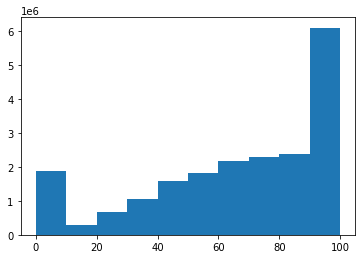

In [13]:
plt.hist("chargelevel", bins = 10, data = may);

In [15]:
may_nullcharge_company= may.chargelevel.isnull().groupby(may.companyname).sum()
print(may_nullcharge_company)

companyname
0      0
1      0
2      0
3      0
4    283
5      0
6      0
Name: chargelevel, dtype: int64


bingo - all 283 null values are in the same company, company 4.  which was a modest sized company with 687 scooters.  I'm not sure yet what that means, but something's going on there.

i wonder about the number of unique id scooter entries - those that have just one entry, is there a pattern there as well?

In [23]:
may.groupby("sumdid").filter(lambda x: len(x) == 1)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
62,2019-05-01 00:01:41.247,36.161052,-86.781899,PoweredYEBSU,73.0,0
4272949,2019-05-09 23:03:18.997,36.134312,-86.667562,PoweredCI6VKIK2KOFMC,6.0,3
4326724,2019-05-10 02:13:10.420,36.164273,-86.769398,Powered523737,100.0,1
7520973,2019-05-16 16:18:48.717,36.141950,-86.789444,Powered3361332,0.0,4
7908151,2019-05-17 05:45:01.127,36.161862,-86.774241,PoweredN4YI2A7RXZQLY,54.0,3
9656375,2019-05-19 23:57:38.663,36.162614,-86.776840,PoweredGJYGPDVTFXRH7,78.0,3
10331574,2019-05-21 01:53:37.427,36.176371,-86.804886,PoweredCW742BQMJ3XHN,0.0,3
14738928,2019-05-26 03:17:34.450,36.153148,-86.793122,Powered8019965,100.0,4
16270541,2019-05-27 21:46:35.653,36.176051,-86.766090,Powered1PKP7,82.0,0
19207378,2019-05-30 22:07:00.887,36.147729,-86.740345,Powered6599831,71.0,4


well, there's not as many as i thought there might be - just 10, 
and company 3 has 4 of them, while company 4 has 3 of them.  No real insights here ... 

dates all over the place.  chargelevels all over.  all in different places.  i see no pattern with these single entry scooters.  and given that it's 10 out of 8300 ... not significant.